In [89]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/UnsupervisedMachineLearningAlgorithm/K_means_clustring/Crop_recommendation.csv")

In [93]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [94]:
df.shape

(2200, 8)

In [95]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [96]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [99]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [101]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [102]:
df['label'].nunique()

22

In [103]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

#Convert the floating point colunms to the integer

In [104]:
df['temperature'] = df['temperature'].round().astype(int)     

In [105]:
df['humidity'] = df['humidity'].round().astype(int) 

In [106]:
df['ph'] = df['ph'].round().astype(int) 

In [107]:
df['rainfall'] = df['rainfall'].round().astype(int) 

In [108]:
x= df.drop('label',axis=1)
y = df['label']

#Clustering

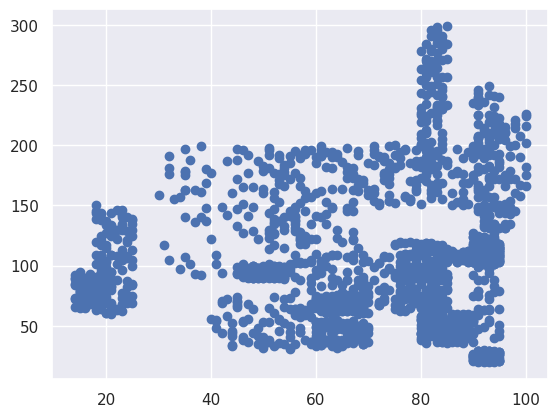

In [109]:
plt.scatter(df['humidity'],df['rainfall'])

In [110]:
cluster = df.loc[:, ['humidity','rainfall']].values  #loc[all rowa, ['specific columns]]
cluster.shape

(2200, 2)

In [111]:
cluster_data  = pd.DataFrame(cluster)
cluster_data.head()

,0,1
0,82,203
1,80,227
2,82,264
3,80,243
4,82,263


In [112]:
#MinMaxScaler subtracts the minimum value in the feature and then divides by the range.
#The range is the difference between the original maximum and original minimum.
#The default range for the feature returned by MinMaxScaler is 0 to 1.

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_scaled=scaler.fit_transform(cluster_data)  #fit_transform() used to scale the value of the cluster_data
cluster_scaled = pd.DataFrame(cluster_scaled, columns=['humidity','rainfall'])

In [114]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [115]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1760, 7), (440, 7))

In [116]:
# check data types in X_train
X_train.dtypes

N              int64
P              int64
K              int64
temperature    int64
humidity       int64
ph             int64
rainfall       int64
dtype: object

In [117]:
# check data types in X_train
y_test.dtypes

dtype('O')

In [128]:
from sklearn.cluster import KMeans

In [129]:
kmeans = KMeans(n_clusters=2)

In [130]:
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2)

In [131]:
labels = kmeans.predict(X_test)

In [132]:
centroids = kmeans.cluster_centers_

In [133]:
centroids

array([[ 53.86528822,  45.33834586,  32.83270677,  25.76378446,
         70.06578947,   6.55200501, 104.89724311],
       [ 21.7804878 , 133.27439024, 199.9695122 ,  23.20121951,
         87.14634146,   6.        ,  91.25      ]])

#Perform clustring on the dataset.
The code is determining the optimal number of clusters by plotting the Within-Cluster-Sum-of-Squares (WCSS) versus the number of clusters.


The WCSS is the sum of the squared distances between each data point and its assigned cluster centroid. The optimal number of clusters is often chosen as the value of k at the "elbow" of the resulting plot, where adding more clusters does not significantly decrease the WCSS.

In [134]:
from sklearn.cluster import KMeans
wcss = []   #Within-Cluster-Sum-of-Squares (wcss)
for i in range(1, 11):  # from 1 to 10 
    km = KMeans(n_clusters = i, init = 'k-means++') #'k-means++' initialization method.
    km.fit(cluster_data)
    wcss.append(km.inertia_) #km.inertia_ returns the Within-Cluster-Sum-of-Squares (WCSS) for the fitted KMeans object km.

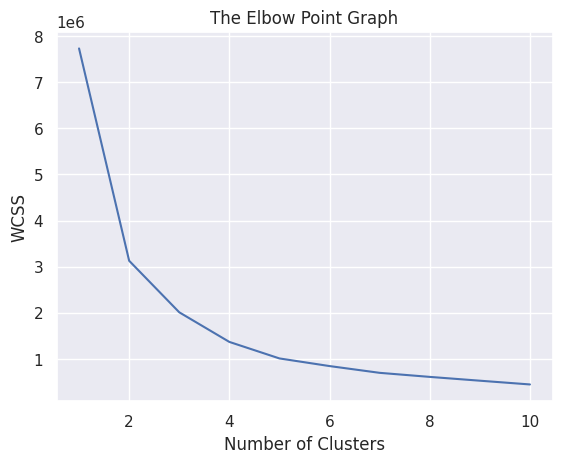

In [135]:
import seaborn as sns
sns.set()  #to set the default seaborn theme for the plot.
plt.plot(range(1,11), wcss)  #plt.plot() method to plot the WCSS values (wcss) against the number of clusters (range(1,11)).
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

In [136]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#init = 'k-means++': selects a smart way to initialize the centroids to speed up convergence
#n_init = 10: specifies the number of times the KMeans algorithm will be run with different centroid points. 
#The final results will be the best output of n_init consecutive runs in terms of inertia.
y_means = km.fit_predict(cluster_scaled)

a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([cluster_scaled['humidity'],cluster_scaled['rainfall'],y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'}) 
#z = z.rename(columns = {0: 'cluster'}) renames the first column of z (which contains the cluster assignments from y_means) to 'cluster'.
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
#print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())

Crops in First Cluster: ['rice' 'maize' 'pigeonpeas' 'mungbean' 'blackgram' 'lentil' 'pomegranate'
 'banana' 'grapes' 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya'
 'coconut' 'cotton' 'jute' 'coffee']
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'blackgram'
 'lentil' 'mango' 'coffee']


[[0.82502769 0.31888016]
 [0.3662094  0.26103308]]


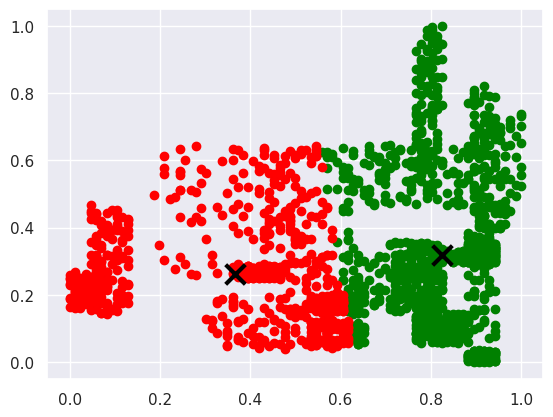

In [137]:
centers=km.cluster_centers_
print(centers)
c1=z[z['cluster'] == 0]   #"c1" represents a subset of the original DataFrame "z" that contains only the rows belonging to cluster 0. 
c2=z[z['cluster'] == 1]
#c3=z[z['cluster'] == 2]
plt.scatter(c1['humidity'],c1['rainfall'],color='green')
plt.scatter(c2['humidity'],c2['rainfall'],color='red')
#plt.scatter(c3['humidity'],c3['rainfall'],color='blue')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='black')
#The first argument "centers[:, 0]" represents the x-coordinates of the centroids, and the second argument "centers[:, 1]" represents the y-coordinates.
#The "[:, 0]" and "[:, 1]" slicing is used to extract the first and second column of the "centers" array,